In [1]:
from utils import *
from nearest_neighbor import *
import matplotlib.pyplot as plt

In [2]:
path_data = "/Users/lou/Thesis/BCR_Clone_Identification/Data/"
path_sample = "/Users/lou/Thesis/BCR_Clone_Identification/Data/sample90/"

In [3]:
Nt_file = path_sample+"3_Nt-sequences.txt"
outfile = path_data+"Nt_info.csv"
# read_data(Nt_file,outfile)

In [4]:
df = pd.read_csv(outfile,sep='\t')
df

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,1,M06023:233:000000000-JCVJP:1:1102:22274:8511_1...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0
1,3,M06023:233:000000000-JCVJP:1:1102:23002:8543_1...,Homsap IGHV2-5,Homsap IGHJ4,acaccgaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcggggtcgacgggctggtccaggactttg...,54.0
2,4,M06023:233:000000000-JCVJP:1:1102:11694:8553_1...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0
3,5,M06023:233:000000000-JCVJP:1:1102:14232:8560_1...,Homsap IGHV1-46,Homsap IGHJ4,gcatctggatacatcttcaccagctactttatgcactgggtgcgac...,tgtgcgagagatgggtcgattgagtggctacgattgggctactgg,45.0
4,7,M06023:233:000000000-JCVJP:1:1102:9846:8586_1:...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccgtctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0
...,...,...,...,...,...,...,...
19190,81302,M06023:233:000000000-JCVJP:1:2119:18177:24811_...,Homsap IGHV1-46,Homsap IGHJ6,gcatctggatacaccttcaccagctactatatacactggctacgac...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
19191,81306,M06023:233:000000000-JCVJP:1:2119:19235:24852_...,Homsap IGHV1-2,Homsap IGHJ4,gcttctggatacaccttcaccgactactatatgcactgggtgcgac...,tgtgcgagagatgggtcgattgtgtggccacgattgggctactgg,45.0
19192,81310,M06023:233:000000000-JCVJP:1:2119:17091:24945_...,Homsap IGHV1-2,Homsap IGHJ4,ggcctcagttctcctgcaaggcttctggatacaccttcaccgacta...,tgtgcgagagcctcagactactgg,24.0
19193,81312,M06023:233:000000000-JCVJP:1:2119:15970:24974_...,Homsap IGHV1-46,Homsap IGHJ4,gaatctggatacatcttcaccagctactatatgcactgggtgcgac...,tgtgcgagagatgggtcgattgagtggccacgattgggctactgg,45.0


In [5]:
keys, values = group_seq(df)

## Calculate distance to the nearest (not identical) distribution using all sequence pairs

### Using Hamming distance
#### without removing duplicates

Only compute the distance when the sequence pair are of the same 

But put everything together to get one distribution

Comparable because the distance is normalized by the length

In [ ]:
import time
start_time = time.time()
df_summary = pd.DataFrame(columns=["Junction length","number of seq","index","d to nearest"])
for i,length in enumerate(keys1):
    index = list(values1)[i]
    n_seq = len_counts[length]
    dis = dist_groupwise(df,index)
    d_to_nearest = dist_to_nearest(dis)
    df_summary.append({"Junction length":length,
                       "number of seq":n_seq,
                       "index":index,
                       "d to nearest":d_to_nearest},
                      ignore_index=True)
print("--- %s seconds ---" % (time.time() - start_time))

Didn't finish computing.

Conclusion: cost too many time to compute, infeasible.

#### With duplicated sequences removed:

In [7]:
%%time
d_to_nearest_all = dist_to_nearest_all_exhaustive(df)

For group ['JUNCTION length'] = 24.0 , 1979 sequences, 1957231 calls, use 9.649024 seconds.
For group ['JUNCTION length'] = 30.0 , 68 sequences, 2278 calls, use 0.011823 seconds.
For group ['JUNCTION length'] = 33.0 , 6 sequences, 15 calls, use 0.000978 seconds.
For group ['JUNCTION length'] = 36.0 , 2 sequences, 1 calls, use 0.000463 seconds.
For group ['JUNCTION length'] = 39.0 , 276 sequences, 37950 calls, use 0.185266 seconds.
For group ['JUNCTION length'] = 42.0 , 574 sequences, 164451 calls, use 0.856731 seconds.
For group ['JUNCTION length'] = 45.0 , 3268 sequences, 5338278 calls, use 32.190146 seconds.
For group ['JUNCTION length'] = 48.0 , 2909 sequences, 4229686 calls, use 31.757329 seconds.
For group ['JUNCTION length'] = 51.0 , 348 sequences, 60378 calls, use 0.422858 seconds.
For group ['JUNCTION length'] = 54.0 , 5586 sequences, 15598905 calls, use 114.792268 seconds.
For group ['JUNCTION length'] = 57.0 , 28 sequences, 378 calls, use 0.027068 seconds.
For group ['JUNCTIO

In [8]:
len(d_to_nearest_all)

19194

In [9]:
d_to_nearest_all

array([0., 0., 0., ..., 0., 0., 0.])

(array([1.8794e+04, 3.6100e+02, 1.1000e+01, 1.7000e+01, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.01259259, 0.02518519, 0.03777778, 0.05037037,
        0.06296296, 0.07555556, 0.08814815, 0.10074074, 0.11333333,
        0.12592593, 0.13851852, 0.15111111, 0.1637037 , 0.1762963 ,
        0.18888889, 0.20148148, 0.21407407, 0.22666667, 0.23925926,
        0.25185185, 0.26444444, 0.27703704, 0.

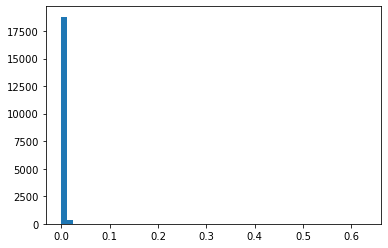

In [10]:
plt.hist(d_to_nearest_all,bins=50)

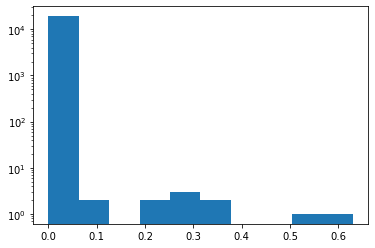

In [16]:
plt.hist(d_to_nearest_all,bins=10)
plt.yscale('log')
plt.show()

Filtering out the dominant components

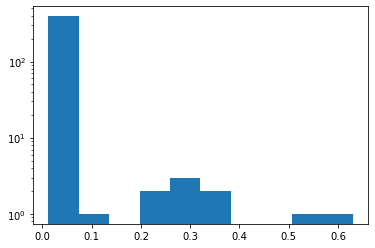

In [17]:
plt.hist(d_to_nearest_all[np.array(d_to_nearest_all>0)],bins=10)
plt.yscale('log')
plt.show()

In [36]:
freq = df.groupby(["JUNCTION"]).size().sort_values()
freq

JUNCTION
cgtgcacacagctctgtcggggtcgaccggctggtccaggactttgactactgg       1
tgtgcgagagatgggtcgattgagtggccacgattgggctaccgg                1
tgtgcgagagatgggtcgattgagtggccacgattggactactgg                1
tgtgcgagagatgggtcgattgagtggcaacgattggggtactgg                1
tgtgcgagagatgggtcgattaagtggcgacgattggggtactgg                1
                                                          ... 
tgtgcacacagctctgtcggggtcgacgggctggtccaggactttgactactgg     778
tgtgcacacagctctgtcggggtcgaccggctggtccaggactttgactactgg     968
tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg          1194
tgtgcgagagatgggtcgattgagtggccacgattgggctactgg             1196
tgtgcgagagcctcagactactgg                                  1966
Length: 623, dtype: int64

In [39]:
freq[freq!=1].sum()

18791

In [46]:
list(df.groupby(["JUNCTION"]).groups.values())[24]

Int64Index([3815, 8130], dtype='int64')

In [54]:
df.loc[[3815,8130],:]

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
3815,10834,M06023:233:000000000-JCVJP:1:2113:8120:21140_1...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccagctactggatcggctgggtgc...,tatgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0
8130,27772,M06023:233:000000000-JCVJP:1:2105:24490:5083_1...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tatgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0


In [66]:
a = df.loc[3815,"V-D-J-REGION"]
a

'aagggttctggatacagttttaccagctactggatcggctgggtgcgccagatgcccgggaaaggcctggagtggatggggatcatctctcctggttactctgataccagatacagcccgtccttccaaggccaggtcaccatctcagccgacaagtccatcagtaccgcctacttgcagtggagtagcctgaaggcctcggacaccgccatgtattactatgcgaggtcaaattatcatgatagtagtggttaccactactacgacggtatggacgtctggggccaagggaccac'

In [67]:
b = df.loc[8130,"V-D-J-REGION"]
b

'aagggttctggatacagttttaccaactactggatcggctgggtgcgccagatgcccgggaagggcctggagtggatggggatcatctctcccggtgactctgataccagatacagcccgtccttccaaggccaggtcaccatctcagccgacaagtccatcagtaccgcctacttgcagtggagtagcctgaaggcctcggacaccgccatgtatttctatgcgaggtcaaattatcatgatagtagtggttaccactactacgacggtatggacgtctggggccaagggaccac'

In [74]:
b[20:30] != a[20:30]

False

In [75]:
b[20:30]

'taccaactac'

In [76]:
a[20:30]

'taccagctac'

In [93]:
ind = list(df.groupby(["JUNCTION"]).groups.values())[520]
ind

Int64Index([   28,    82,    97,   135,   140,   270,   319,   324,   375,
              412,
            ...
            18311, 18421, 18520, 18569, 18581, 18657, 18684, 18959, 19042,
            19190],
           dtype='int64', length=228)

In [94]:
df.loc[ind,:]

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
28,45,M06023:233:000000000-JCVJP:1:1102:8885:8937_1:...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
82,146,M06023:233:000000000-JCVJP:1:1102:7252:9776_1:...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
97,168,M06023:233:000000000-JCVJP:1:1102:25559:9986_1...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccagctactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
135,240,M06023:233:000000000-JCVJP:1:1102:14334:10670_...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccagctactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
140,247,M06023:233:000000000-JCVJP:1:1102:13369:10748_...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
...,...,...,...,...,...,...,...
18657,78451,M06023:233:000000000-JCVJP:1:2118:10470:16615_...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaacaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
18684,78574,M06023:233:000000000-JCVJP:1:2118:5244:17650_1...,Homsap IGHV5-51,Homsap IGHJ6,gcagcctctgaattcaccctcaatgcctactatatgagctggatac...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
18959,80058,M06023:233:000000000-JCVJP:1:2119:18108:11995_...,Homsap IGHV5-51,Homsap IGHJ6,taagggttctggatacagttttaccagctactggatcggctgggtg...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0
19042,80505,M06023:233:000000000-JCVJP:1:2119:16397:15782_...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcataataatagtggttaccactactacg...,63.0


In [95]:
a = df.loc[28,"V-D-J-REGION"]
a

'aagggttctggatacagttttaccaactactggatcggctgggtgcgccagatgcccgggaagggcctggagtggatggggatcatctctcccggtgactctgataccagatacagcccgtccttccaaggccaggtcaccatctcagccgacaagtccatcagtaccgcctacttgcagtggagtagcctgaaggcctcggacaccgccatgtattactgtgcgaggtcaaattatcataataatagtggttaccactactacgacggtatggacgtctggggccaagggaccac'

In [96]:
b = df.loc[83,"V-D-J-REGION"]
b

'gcttctggatacaccttcaccgactactatatgcactgggtgcgacaggcccctggacaagggcttgagtggatgggatggatcaaccctaacagtggtggcacaaactctgcacagaagtttcagggcagggtcaccatgaccagggacacgtccatcagcacagcctacatggagctgagcaggctgagatctgacgacacggccgtgtattactgtgcgagagataccgttggaactacggttgatgcttttgatatctggggcccagggacaat'

In [110]:
b[0:10] == a[0:10]

False

In [103]:
a==b

False

In [112]:
b[0:10]

'gcttctggat'

In [111]:
a[0:10]

'aagggttctg'

In [115]:
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
df_unique

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,1,M06023:233:000000000-JCVJP:1:1102:22274:8511_1...,Homsap IGHV5-51,Homsap IGHJ6,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0
1,3,M06023:233:000000000-JCVJP:1:1102:23002:8543_1...,Homsap IGHV2-5,Homsap IGHJ4,acaccgaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcggggtcgacgggctggtccaggactttg...,54.0
2,4,M06023:233:000000000-JCVJP:1:1102:11694:8553_1...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0
3,5,M06023:233:000000000-JCVJP:1:1102:14232:8560_1...,Homsap IGHV1-46,Homsap IGHJ4,gcatctggatacatcttcaccagctactttatgcactgggtgcgac...,tgtgcgagagatgggtcgattgagtggctacgattgggctactgg,45.0
4,8,M06023:233:000000000-JCVJP:1:1102:28057:8591_1...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccgtctctgggttctcactca...,tgtccacacagctctataggggtcgacgggctggtccaggactttg...,54.0
...,...,...,...,...,...,...,...
618,79933,M06023:233:000000000-JCVJP:1:2119:2029:10889_1...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtccactcagctctataggggtcgacgggctggtccaggactttg...,54.0
619,79955,M06023:233:000000000-JCVJP:1:2119:23986:11093_...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtcggggtcgaccggctggtccaggactttg...,54.0
620,80553,M06023:233:000000000-JCVJP:1:2119:5129:16212_1...,Homsap IGHV1-24,Homsap IGHJ6,gtttccggatacaccctcactgaattatccatgcactgggtgcgac...,tgtgcaacagagctttatcgtcccctttattactataataatcgtg...,60.0
621,81003,M06023:233:000000000-JCVJP:1:2119:9252:20529_1...,Homsap IGHV2-5,Homsap IGHJ4,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0


In [116]:
%%time
d_to_nearest_all = dist_to_nearest_all_exhaustive(df_unique)

For group ['JUNCTION length'] = 24.0 , 14 sequences, 91 calls, use 0.001884 seconds.
For group ['JUNCTION length'] = 30.0 , 2 sequences, 1 calls, use 0.000875 seconds.
For group ['JUNCTION length'] = 33.0 , 2 sequences, 1 calls, use 0.000746 seconds.
For group ['JUNCTION length'] = 39.0 , 7 sequences, 21 calls, use 0.000743 seconds.
For group ['JUNCTION length'] = 42.0 , 15 sequences, 105 calls, use 0.001982 seconds.
For group ['JUNCTION length'] = 45.0 , 64 sequences, 2016 calls, use 0.013104 seconds.
For group ['JUNCTION length'] = 48.0 , 61 sequences, 1830 calls, use 0.013916 seconds.
For group ['JUNCTION length'] = 51.0 , 16 sequences, 120 calls, use 0.001420 seconds.
For group ['JUNCTION length'] = 54.0 , 250 sequences, 31125 calls, use 0.224725 seconds.
For group ['JUNCTION length'] = 57.0 , 6 sequences, 15 calls, use 0.000816 seconds.
For group ['JUNCTION length'] = 60.0 , 63 sequences, 1953 calls, use 0.018773 seconds.
For group ['JUNCTION length'] = 63.0 , 68 sequences, 2278 c

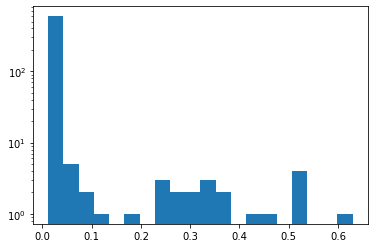

In [122]:
plt.hist(d_to_nearest_all,bins=20)
plt.yscale('log')
plt.show()